# Applied Data Science with Python – Final Project  
## __Sales Analysis for AAL - Q4 2020__ 

## 1. Project Overview
AAL is a well-established brand operating across various states in Australia. This analysis is focused on understanding Q4 sales performance by demographics, time periods, and locations to support data-driven decision-making for expansion.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import importlib
from data_wrangling import datawrangling
from data_analysis import dataanalysis
from data_visualization import datavisualization



## 2. Data Wrangling
### Loading the data

In [2]:
df = pd.read_csv('AusApparalSales4thQrt2020.csv');

### a. Identifying Missing and Incorrect Entries

To ensure the dataset is clean, we used the following functions to inspect missing values:

- `df.isna()` – Checks for **null values** in the dataset.
- `df.notna()` – Confirms the presence of **valid data**.

We examined each column to understand where data might be incomplete or inconsistent.

In [3]:
dfwrangling = datawrangling(df)
dfwrangling.datainspection();


Inspecting the first few rows of the DataFrame.
         Date        Time State     Group  Unit  Sales
0  1-Oct-2020     Morning    WA      Kids     8  20000
1  1-Oct-2020     Morning    WA       Men     8  20000
2  1-Oct-2020     Morning    WA     Women     4  10000
3  1-Oct-2020     Morning    WA   Seniors    15  37500
4  1-Oct-2020   Afternoon    WA      Kids     3   7500

Displaying the last few rows of the DataFrame
             Date        Time State     Group  Unit  Sales
7555  30-Dec-2020   Afternoon   TAS   Seniors    14  35000
7556  30-Dec-2020     Evening   TAS      Kids    15  37500
7557  30-Dec-2020     Evening   TAS       Men    15  37500
7558  30-Dec-2020     Evening   TAS     Women    11  27500
7559  30-Dec-2020     Evening   TAS   Seniors    13  32500

Providing information about the DataFrame, including data types and non-null counts
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  

### b. Recommendations for Treating Missing or Incorrect Data

Based on data analytics best practices:

- If a row has only a few missing entries, **imputation** (e.g., using mean or median) can be considered.
- If critical fields like `Sales` or `Unit` are missing and cannot be reasonably inferred, **dropping the null rows** is the most reliable approach to preserve analysis accuracy.


In [4]:
# Checking for missing values and duplicated to clean them
df = dfwrangling.clean_null_records()


Missing values not found and cleaned (number of null rows).

Non-null values per column :

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

Duplicated values not found.


Recommendations:
- **Fill with median/mean** if nulls are systematic or frequent in non-categorical columns.

In [5]:
df['Sales'] = df['Sales'].fillna(df['Sales'].median())
df['Unit'] = df['Unit'].fillna(df['Unit'].median())
df['Group'] = df['Group'].fillna(df['Group'].mode()[0])

### c. Applying Normalization

To bring all numerical data into a common scale, **Normalization** was selected. This ensures fair comparison, especially when dealing with features like `Sales` and `Unit`.

Normalization technique used:
\[
X_{\text{normalized}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
\]

This transformation was applied to selected numeric columns using `MinMaxScaler` from `sklearn.preprocessing`.


In [6]:
df = dfwrangling.data_normalization(df)

df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Day'] = pd.to_datetime(df['Date']).dt.day

DataFrame with new features:
             Date        Time State     Group  Unit  Sales  Log_Sales  \
0      1-Oct-2020     Morning    WA      Kids     8  20000   9.903488   
1      1-Oct-2020     Morning    WA       Men     8  20000   9.903488   
2      1-Oct-2020     Morning    WA     Women     4  10000   9.210340   
3      1-Oct-2020     Morning    WA   Seniors    15  37500  10.532096   
4      1-Oct-2020   Afternoon    WA      Kids     3   7500   8.922658   
...           ...         ...   ...       ...   ...    ...        ...   
7555  30-Dec-2020   Afternoon   TAS   Seniors    14  35000  10.463103   
7556  30-Dec-2020     Evening   TAS      Kids    15  37500  10.532096   
7557  30-Dec-2020     Evening   TAS       Men    15  37500  10.532096   
7558  30-Dec-2020     Evening   TAS     Women    11  27500  10.221941   
7559  30-Dec-2020     Evening   TAS   Seniors    13  32500  10.388995   

      Normalized_Sales  
0             0.095238  
1             0.095238  
2             0.031

### d. Application of `GroupBy()` for Chunking or Merging

The `groupby()` function in pandas was effectively used to:

- **Chunk data** by categorical variables such as `State`, `Group`, and `Week`.
- **Aggregate metrics** such as total sales, average units, and transaction counts.

This helped in transforming raw transactional data into **summarized reports**, making trends and comparisons clearer.


In [7]:
## dfwrangling.data_insights_group(df)
group_cols = ['State', 'Time', 'Group']
agg_col = 'Sales'

agg_func = 'mean'
avg_sales = dfwrangling.data_insights_group(df, group_cols, agg_col, agg_func)

sum_func = 'sum'
sum_sales = dfwrangling.data_insights_group(df, group_cols, agg_col, sum_func)

count_func = 'count'
count_sales = dfwrangling.data_insights_group(df, group_cols, agg_col, count_func)

print("\nAverage Sales by State, Time, and Group:\n", avg_sales)
print("\nTotal Sales by State, Time, and Group:\n", sum_sales)
print("\nNumber of Transactions by State, Time, and Group:\n", count_sales)


Average Sales by State, Time, and Group:
    State        Time     Group         Sales
0    NSW   Afternoon      Kids  68750.000000
1    NSW   Afternoon       Men  72361.111111
2    NSW   Afternoon   Seniors  66500.000000
3    NSW   Afternoon     Women  71388.888889
4    NSW     Evening      Kids  68138.888889
..   ...         ...       ...           ...
79    WA     Evening     Women  20111.111111
80    WA     Morning      Kids  20472.222222
81    WA     Morning       Men  22305.555556
82    WA     Morning   Seniors  21666.666667
83    WA     Morning     Women  19638.888889

[84 rows x 4 columns]

Total Sales by State, Time, and Group:
    State        Time     Group    Sales
0    NSW   Afternoon      Kids  6187500
1    NSW   Afternoon       Men  6512500
2    NSW   Afternoon   Seniors  5985000
3    NSW   Afternoon     Women  6425000
4    NSW     Evening      Kids  6132500
..   ...         ...       ...      ...
79    WA     Evening     Women  1810000
80    WA     Morning      Kids  1

## 3. Data Analysis

In this section, we analyze the Sales and Unit data to derive meaningful insights using descriptive statistics and time-based reporting.
### a. Descriptive Statistical Analysis

We applied key statistical measures on the `Sales` and `Unit` columns:

- **Mean**: Represents the average sales and units sold.
- **Median**: Identifies the central tendency, robust against outliers.
- **Mode**: The most frequent value observed in sales and units.
- **Standard Deviation**: Measures the spread or dispersion in the dataset.

These metrics help understand the distribution and variability of sales and units across the dataset.


In [8]:
dfanalysis = dataanalysis(df)

group_cols = ['State']
agg_col = 'Sales'

result_salesdf = dfanalysis.descriptive_statistic(df, group_cols, agg_col)
if result_salesdf.empty:
     print("\nDescriptive Analysis for Sales is empty.\n")
else:
    print("\nDescriptive Analysis for Sales:\n")
    print(result_salesdf.round(2))
    
agg_col = 'Unit'
result_unitdf = dfanalysis.descriptive_statistic(df, group_cols, agg_col)
if result_unitdf.empty:
     print("\nDescriptive Analysis for Unit is empty.\n")
else:
    print("\nDescriptive Analysis for Unit:\n")
    print(result_unitdf.round(2))


mean_sales = df['Sales'].mean()
median_sales = df['Sales'].median()
mode_sales = df['Sales'].mode().tolist()
std_sales = df['Sales'].std()

mean_unit = df['Unit'].mean()
median_unit = df['Unit'].median()
mode_unit = df['Unit'].mode().tolist()
std_unit = df['Unit'].std()

# Print results
print("\nDescriptive Analysis for Sales:")
print(f"Mean: {mean_sales}")
print(f"Median: {median_sales}")
print(f"Mode: {mode_sales}")
print(f"Standard Deviation: {std_sales:.2f}\n")

print("Descriptive Analysis for Unit:")
print(f"Mean: {mean_unit}")
print(f"Median: {median_unit}")
print(f"Mode: {mode_unit}")
print(f"Standard Deviation: {std_unit:.2f}")


Descriptive Analysis for Sales:

  State      mean   median       std    mode
0   NSW  69416.67  70000.0  20626.65   75000
1    NT  20907.41  20000.0   8961.91   22500
2   QLD  30942.13  30000.0  13344.64   22500
3    SA  54497.69  52500.0  17460.97   62500
4   TAS  21074.07  20000.0   9024.68   25000
5   VIC  97745.37  95000.0  26621.60  102500
6    WA  20511.57  20000.0   9231.91   15000

Descriptive Analysis for Unit:

  State   mean  median    std  mode
0   NSW  27.77    28.0   8.25    30
1    NT   8.36     8.0   3.58     9
2   QLD  12.38    12.0   5.34     9
3    SA  21.80    21.0   6.98    25
4   TAS   8.43     8.0   3.61    10
5   VIC  39.10    38.0  10.65    41
6    WA   8.20     8.0   3.69     6

Descriptive Analysis for Sales:
Mean: 45013.5582010582
Median: 35000.0
Mode: [22500]
Standard Deviation: 32253.51

Descriptive Analysis for Unit:
Mean: 18.00542328042328
Median: 14.0
Mode: [9]
Standard Deviation: 12.90


### b. Group with Highest and Lowest Sales

Using group-level aggregation (`groupby('Group')['Sales'].sum()`), we identified:

- **Highest Sales Group**: `<Group_Name>` with total sales of `<Total_Sales_Value>`
- **Lowest Sales Group**: `<Group_Name>` with total sales of `<Total_Sales_Value>`

(*Replace `<Group_Name>` and `<Total_Sales_Value>` with actual results from your code output.*)

This allows the marketing team to focus efforts on underperforming groups while leveraging the success of top groups.

In [9]:
group_cols = 'Group'
agg_col = 'Sales'

(minisales, maxsales, result) = dfanalysis.mini_max_by_group(df, group_cols, agg_col)

print("\nGroup with Lowest Sales:")
print(f"{minisales} - {result[minisales]}")

print("Group with Highest Sales:")
print(f"{maxsales} - {result[maxsales]}")

group_cols = 'State'

(minisales, maxsales, result) = dfanalysis.mini_max_by_group(df, group_cols, agg_col)

print("\nState with Lowest Sales:")
print(f"{minisales} - {result[minisales]}")

print("State with Highest Sales:")
print(f"{maxsales} - {result[maxsales]}")



Group with Lowest Sales:
 Seniors - 84037500
Group with Highest Sales:
 Men - 85750000

State with Lowest Sales:
 WA - 22152500
State with Highest Sales:
 VIC - 105565000


In [10]:
# Group by Group and sum the sales
grouped_sum = df.groupby('Group')['Sales'].sum()

# Identify groups with highest and lowest sales
highest_sales_group = grouped_sum.idxmax()
lowest_sales_group = grouped_sum.idxmin()

print("Group with Highest Sales:")
print(f"{highest_sales_group} - {grouped_sum[highest_sales_group]}")

print("\nGroup with Lowest Sales:")
print(f"{lowest_sales_group} - {grouped_sum[lowest_sales_group]}")

Group with Highest Sales:
 Men - 85750000

Group with Lowest Sales:
 Seniors - 84037500


### c. Group with Highest and Lowest Units Sold

Using similar aggregation on `Unit`, we determined:

- **Group with Highest Units Sold**: `<Group_Name>` with `<Total_Units>`
- **Group with Lowest Units Sold**: `<Group_Name>` with `<Total_Units>`

This helps in understanding demand patterns across age demographics.

In [11]:
if minisales == maxsales:
    print(f"\nGroup '{maxsales}' has both the highest and lowest total sales: {result[maxsales]}")
else:
    print(f"\n Different groups have the highest and lowest sales.")
    print(f"Highest Sales → {maxsales} ({result[maxsales]})")
    print(f"Lowest Sales  → {minisales} ({result[minisales]})")


 Different groups have the highest and lowest sales.
Highest Sales →  VIC (105565000)
Lowest Sales  →  WA (22152500)


In [12]:
# Group by group and sum the sales
grouped_sum = df.groupby('Group')['Sales'].sum()

# Identify groups with highest and lowest sales
highest_sales_group = grouped_sum.idxmax()
lowest_sales_group = grouped_sum.idxmin()

if highest_sales_group == lowest_sales_group:
    print(f"\nGroup '{highest_sales_group}' has both the highest and lowest total sales: {grouped_sum[highest_sales_group]}")
else:
    print(f"\n Different groups have the highest and lowest sales.")
    print(f"Highest Sales → {highest_sales_group} ({grouped_sum[highest_sales_group]})")
    print(f"Lowest Sales  → {lowest_sales_group} ({grouped_sum[lowest_sales_group]})")


 Different groups have the highest and lowest sales.
Highest Sales →  Men (85750000)
Lowest Sales  →  Seniors (84037500)


### d. Time-Based Reports (Weekly, Monthly, Quarterly)

We created sales reports segmented by time periods:

- **Weekly Report**: Analyzes trends in sales and units on a weekly basis.
- **Monthly Report**: Highlights monthly peaks and drops in sales performance.
- **Quarterly Report**: Summarizes overall Q4 performance to guide strategic planning.

These reports provide valuable insights into seasonality and campaign timing.

In [13]:
time_col = 'Date'

df = dfanalysis.datetime_feature_extraction(df, time_col)
print("Feature Extraction (Day, Week, Month, Quarter, Year):\n", df)

Feature Extraction (Day, Week, Month, Quarter, Year):
              Date        Time State     Group  Unit  Sales  Log_Sales  \
0      1-Oct-2020     Morning    WA      Kids     8  20000   9.903488   
1      1-Oct-2020     Morning    WA       Men     8  20000   9.903488   
2      1-Oct-2020     Morning    WA     Women     4  10000   9.210340   
3      1-Oct-2020     Morning    WA   Seniors    15  37500  10.532096   
4      1-Oct-2020   Afternoon    WA      Kids     3   7500   8.922658   
...           ...         ...   ...       ...   ...    ...        ...   
7555  30-Dec-2020   Afternoon   TAS   Seniors    14  35000  10.463103   
7556  30-Dec-2020     Evening   TAS      Kids    15  37500  10.532096   
7557  30-Dec-2020     Evening   TAS       Men    15  37500  10.532096   
7558  30-Dec-2020     Evening   TAS     Women    11  27500  10.221941   
7559  30-Dec-2020     Evening   TAS   Seniors    13  32500  10.388995   

      Normalized_Sales  Month  Year  Day                   Week Quar

In [14]:
agg_col = ['Unit','Sales']

group_cols = 'Week'
weekly_report = dfanalysis.time_based_analysis(df, group_cols, agg_col)
print("Weekly Report:\n", weekly_report)

group_cols = 'Month'
monthly_report = dfanalysis.time_based_analysis(df, group_cols, agg_col)
print("\nMonthly Report:\n", monthly_report)

group_cols = 'Quarter'
quarterly_report = dfanalysis.time_based_analysis(df, group_cols, agg_col)
print("\nMonthly Report:\n", quarterly_report)

Weekly Report:
                      Week  Total Units  Average Units  Units Std Dev  \
0   2020-09-28/2020-10-04         6018      17.910714      11.717231   
1   2020-10-05/2020-10-11        10801      18.369048      11.972208   
2   2020-10-12/2020-10-18        10656      18.122449      11.971515   
3   2020-10-19/2020-10-25        10726      18.241497      11.940490   
4   2020-10-26/2020-11-01         8723      17.307540      11.954963   
5   2020-11-02/2020-11-08         8346      14.193878      10.829946   
6   2020-11-09/2020-11-15         8469      14.403061      10.897343   
7   2020-11-16/2020-11-22         8445      14.362245      11.021416   
8   2020-11-23/2020-11-29         8591      14.610544      11.114996   
9   2020-11-30/2020-12-06        11849      20.151361      13.835830   
10  2020-12-07/2020-12-13        12610      21.445578      14.616463   
11  2020-12-14/2020-12-20        12662      21.534014      14.482576   
12  2020-12-21/2020-12-27        12708      21.6

In [15]:
if len(weekly_report) > 1:
    print(f"Weekly Skewness of Sales:{stats.skew(weekly_report['Total Sales']):.4f}")
    print(f"Weekly Skewness of Unit:{stats.skew(weekly_report['Total Units']):.4f}")
else:
    print(f"Weekly Skewness of Sales or Unit not possible.")
    
if len(monthly_report) > 1:
    print(f"Monthly Kurtosis of Sales:{stats.kurtosis(monthly_report['Total Sales']):.4f}")
    print(f"Monthly Kurtosis of Unit:{stats.kurtosis(monthly_report['Total Units']):.4f}")
else:
    print(f"Monthly Kurtosis of Sales or Unit not possible.")

if len(quarterly_report) > 1:
    print(f"Quarterly Kurtosis of Sales:{stats.kurtosis(quarterly_report['Total Sales']):.4f}")
    print(f"Quarterly Kurtosis of Unit:{stats.kurtosis(quarterly_report['Total Units']):.4f}")
else:
   print(f"Quarterly Kurtosis of Sales or Unit not possible.")

Weekly Skewness of Sales:-0.2781
Weekly Skewness of Unit:-0.2781
Monthly Kurtosis of Sales:-1.5000
Monthly Kurtosis of Unit:-1.5000
Quarterly Kurtosis of Sales or Unit not possible.


## 4. Data Visualization

Data visualization plays a crucial role in translating sales data into actionable insights. In this section, we construct visual representations to assist the head of Sales and Marketing (S&M) in making strategic decisions.

### a. Dashboard Components and Use Cases

To enable comprehensive analysis, we created a visual dashboard using `Seaborn`, `Matplotlib`, and `Plotly`. The dashboard covers:

#### State-wise Sales Analysis by Demographic Groups
- A **stacked bar chart** shows how different demographic groups (Kids, Women, Men, Seniors) contribute to sales in each state.
- Helps identify high-performing states and potential areas for targeted campaigns.


In [16]:
dfvisualization = datavisualization(df)
agg_col = 'Sales'
agg_fun = 'sum'
group_cols = ['State','Group']
row_col = 'State'
column = 'Group'
value_col = 'Sales'
state_group_table = dfvisualization.data_pivot_table(df, group_cols, agg_col, agg_fun, row_col, column, value_col)
print("\nState-wise Sales Report:\n")
print(state_group_table)
###stage_group_table.drop(columns='Total').plot(kind='bar', stacked=True, title="State-wise Sales by Group", figsize=(10, 6))



State-wise Sales Report:

Group      Kids       Men   Seniors     Women      Total
State                                                   
NSW    18587500  19022500  18187500  19172500   74970000
NT      5700000   5762500   5465000   5652500   22580000
QLD     8510000   8392500   8190000   8325000   33417500
SA     14515000  14655000  14717500  14970000   58857500
TAS     5775000   5757500   5650000   5577500   22760000
VIC    26360000  26407500  26315000  26482500  105565000
WA      5625000   5752500   5512500   5262500   22152500


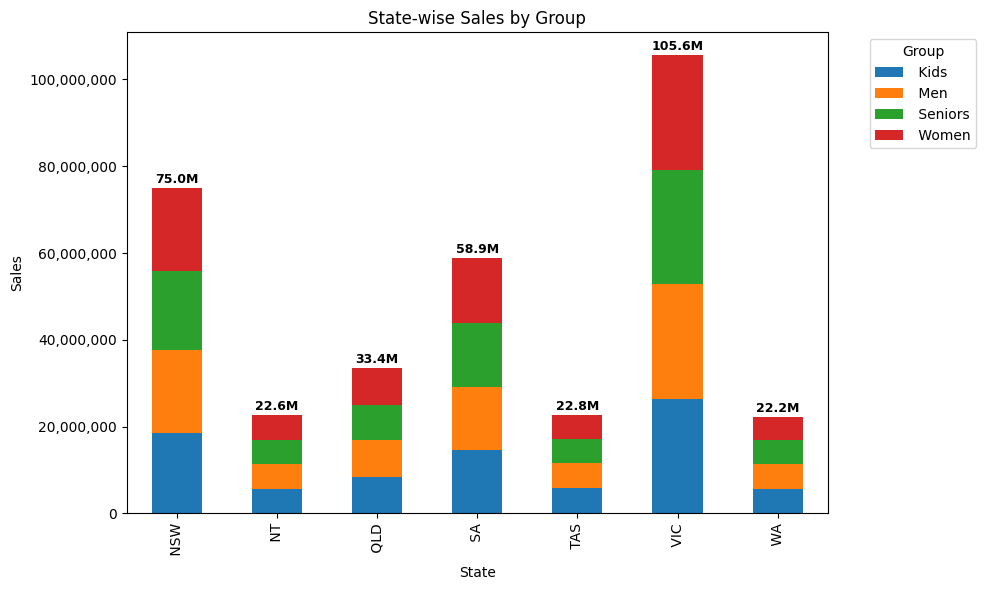

In [17]:
# State-wise Sales by Group
column = 'Total'
xlabel = 'State'
ylabel = 'Sales'
chart_title = 'State-wise Sales by Group'
legend_title = 'Group'
dfvisualization.sales_by_chart(state_group_table, column, xlabel, ylabel, chart_title, legend_title)

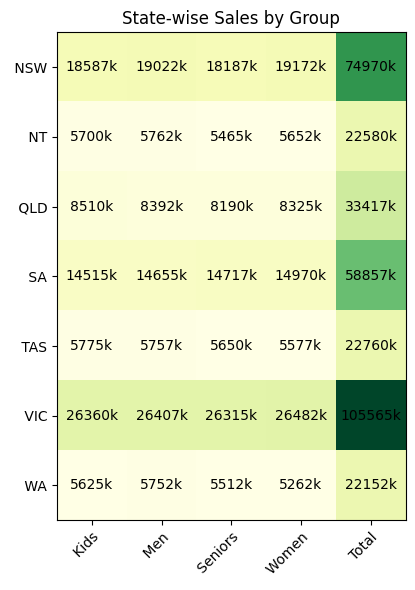

In [18]:
chart_title = 'State-wise Sales by Group'
dfvisualization.heatmap_simple(state_group_table, chart_title)

#### Group-wise Sales Analysis Across States
- A **grouped bar plot or heatmap** compares how each demographic performs across different regions.
- Useful for reallocating marketing budgets or optimizing stock across locations.

In [19]:
group_cols = ['Group','State']
row_col = 'Group'
column = 'State'
group_state_table = dfvisualization.data_pivot_table(df, group_cols, agg_col, agg_fun, row_col, column, value_col)
print("\nGroup-wise Sales Report:\n")
print(group_state_table)
##group_state_table.drop(columns='Total').plot(kind='bar', stacked=True, title="Group-wise Sales by State", figsize=(10, 6))



Group-wise Sales Report:

State         NSW       NT      QLD        SA      TAS       VIC       WA  \
Group                                                                       
Kids     18587500  5700000  8510000  14515000  5775000  26360000  5625000   
Men      19022500  5762500  8392500  14655000  5757500  26407500  5752500   
Seniors  18187500  5465000  8190000  14717500  5650000  26315000  5512500   
Women    19172500  5652500  8325000  14970000  5577500  26482500  5262500   

State       Total  
Group              
Kids     85072500  
Men      85750000  
Seniors  84037500  
Women    85442500  


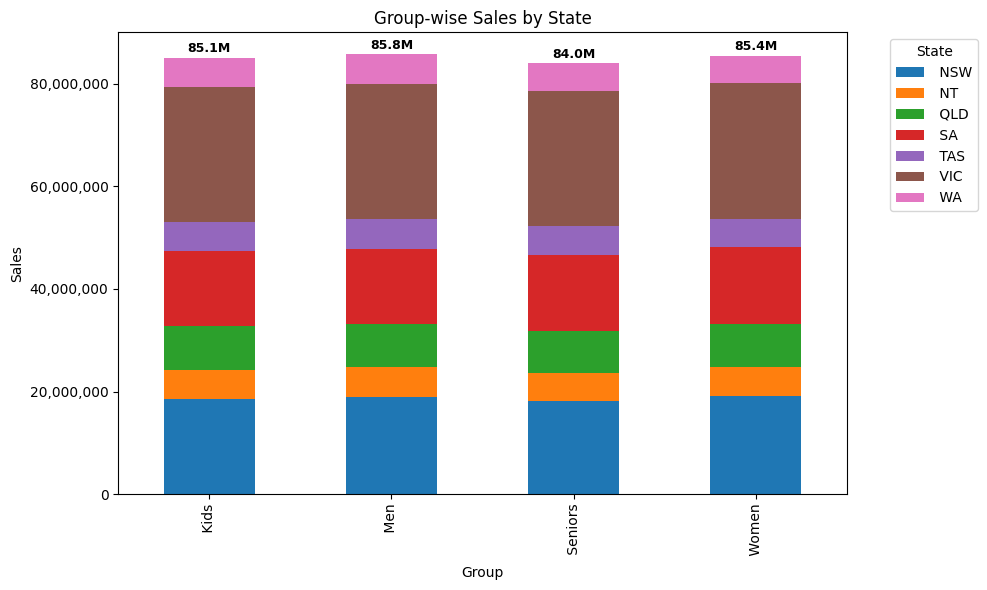

In [20]:
# Group-wise Sales by State
column = 'Total'
xlabel = 'Group'
ylabel = 'Sales'
chart_title = 'Group-wise Sales by State'
legend_title = 'State'
dfvisualization.sales_by_chart(group_state_table, column, xlabel, ylabel, chart_title, legend_title)

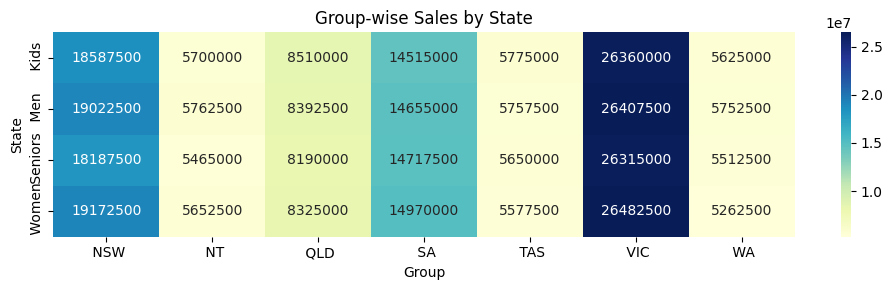

In [21]:
chart_title = 'Group-wise Sales by State'
xlabel = 'Group'
ylabel = 'State' 
column = 'Total'

dfvisualization.heatmap_complex(group_state_table, xlabel, ylabel, column, chart_title)

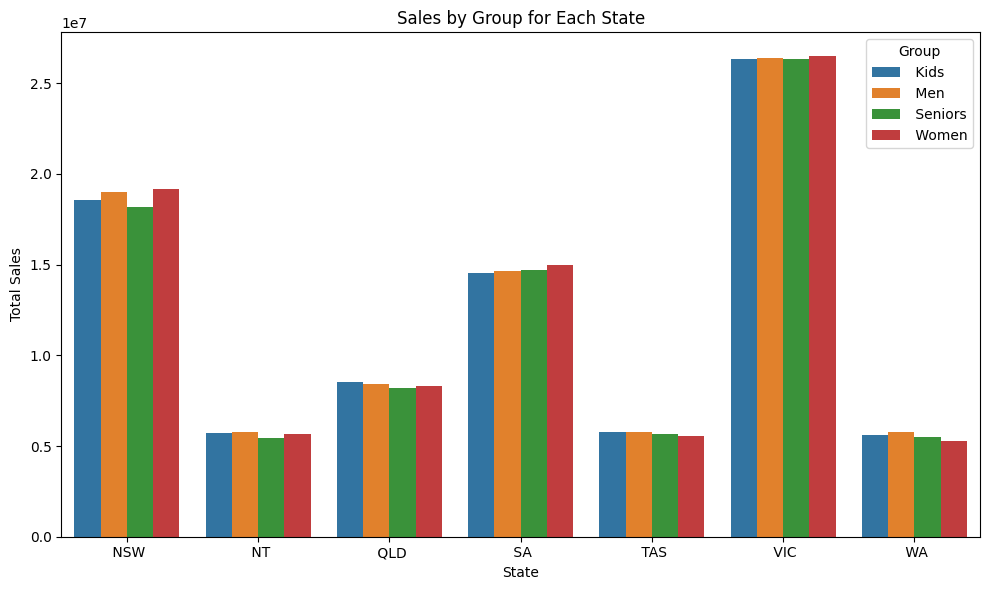

In [25]:
df_bar = state_group_table.drop(columns='Total').reset_index().melt(id_vars='State', var_name='Group', value_name='Sales')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_bar, x='State', y='Sales', hue='Group')
plt.title('Sales by Group for Each State')
plt.ylabel('Total Sales')
plt.xlabel('State')
plt.legend(title='Group')
plt.tight_layout()
plt.show()

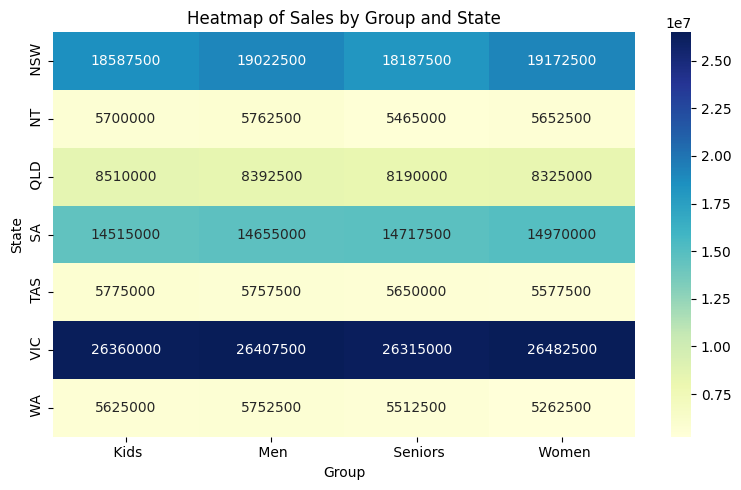

In [33]:
plt.figure(figsize=(8, 5))
sns.heatmap(state_group_table.drop(columns='Total'), annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Heatmap of Sales by Group and State')
plt.xlabel('Group')
plt.ylabel('State')
plt.tight_layout()
plt.show()

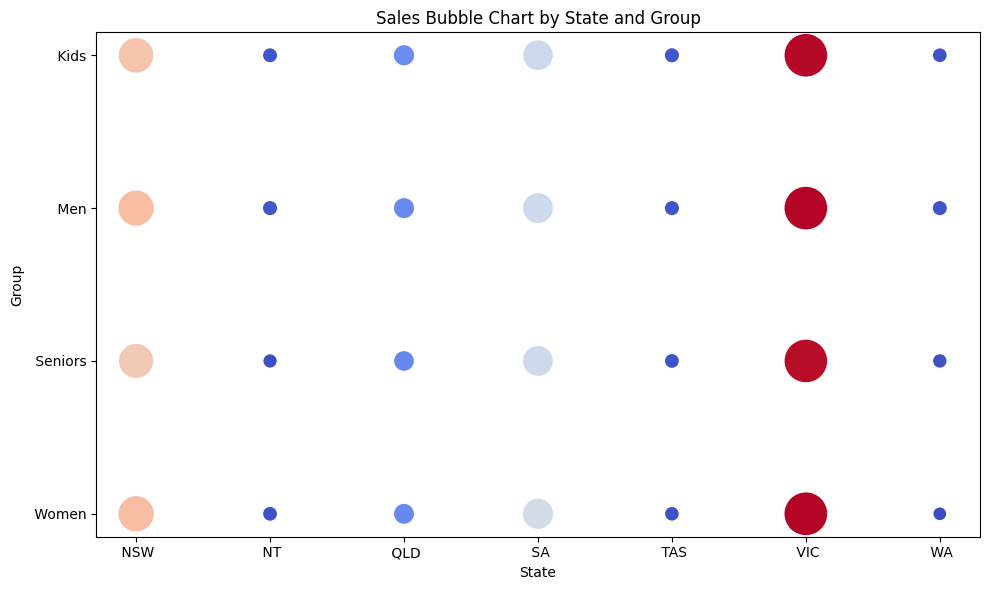

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_bar, x='State', y='Group', size='Sales', hue='Sales', palette='coolwarm', sizes=(100, 1000), legend=False)
plt.title('Sales Bubble Chart by State and Group')
plt.tight_layout()
plt.show()

In [35]:
state_group_table.index = state_group_table.index.astype(str).str.strip()
# Check available states
print("Available states:", state_group_table.index.tolist())

Available states: ['NSW', 'NT', 'QLD', 'SA', 'TAS', 'VIC', 'WA']


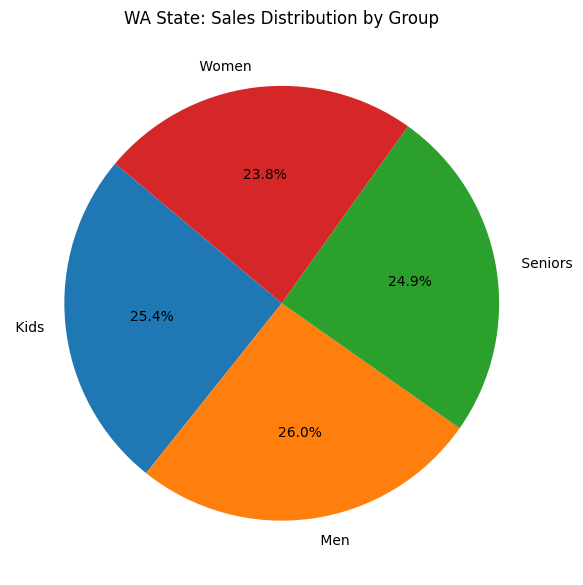

In [38]:
# Example: Pie chart for WA
wa_data = state_group_table.loc['WA'].drop('Total')

plt.figure(figsize=(6, 6))
wa_data.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('WA State: Sales Distribution by Group')
plt.ylabel('')
plt.tight_layout()
plt.show()

## o	Group-wise sales analysis (Kids, Women, Men, and Seniors) across various states.

In [31]:
# Group by Group and State
group_state_sales = df.groupby(['Group', 'State'])['Sales'].sum().reset_index()

# Pivot for a clearer matrix format
groupwise_pivot = group_state_sales.pivot(index='Group', columns='State', values='Sales').fillna(0)

# Optional: Add total sales per group
groupwise_pivot['Total'] = groupwise_pivot.sum(axis=1)

print(groupwise_pivot)

State         NSW       NT      QLD        SA      TAS       VIC       WA  \
Group                                                                       
Kids     18587500  5700000  8510000  14515000  5775000  26360000  5625000   
Men      19022500  5762500  8392500  14655000  5757500  26407500  5752500   
Seniors  18187500  5465000  8190000  14717500  5650000  26315000  5512500   
Women    19172500  5652500  8325000  14970000  5577500  26482500  5262500   

State       Total  
Group              
Kids     85072500  
Men      85750000  
Seniors  84037500  
Women    85442500  


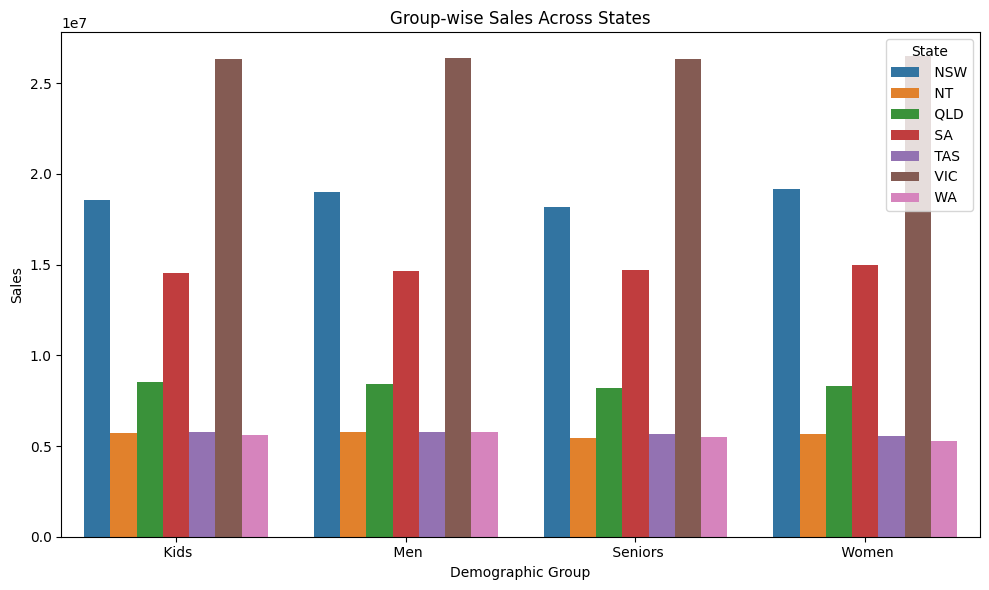

In [41]:
group_state_sales_plot = groupwise_pivot.drop(columns='Total').reset_index().melt(id_vars='Group', var_name='State', value_name='Sales')

plt.figure(figsize=(10, 6))
sns.barplot(data=group_state_sales_plot, x='Group', y='Sales', hue='State')
plt.title("Group-wise Sales Across States")
plt.ylabel("Sales")
plt.xlabel("Demographic Group")
plt.tight_layout()
plt.show()

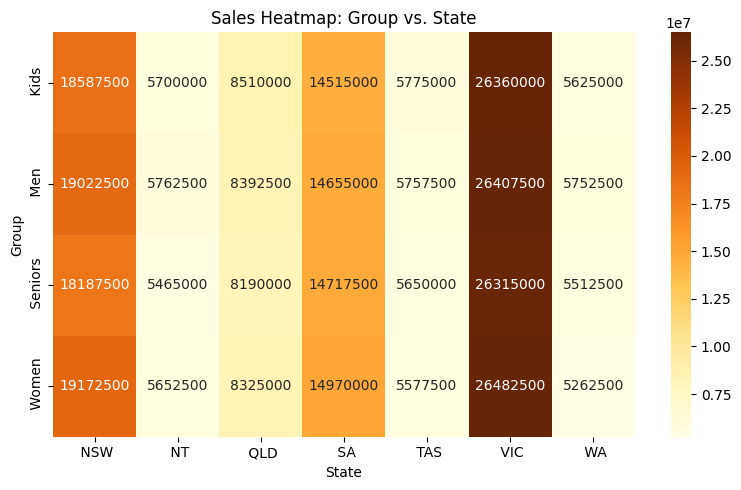

In [40]:
plt.figure(figsize=(8, 5))
sns.heatmap(groupwise_pivot.drop(columns='Total'), annot=True, fmt=".0f", cmap="YlOrBr")
plt.title("Sales Heatmap: Group vs. State")
plt.xlabel("State")
plt.ylabel("Group")
plt.tight_layout()
plt.show()

#### Time-of-the-Day Analysis
- A **line or bar chart** illustrating sales patterns across Morning, Afternoon, and Evening.
- Aids in scheduling promotions, staff shifts, and dynamic pricing strategies.

In [42]:
time_analysis = df.groupby(['Month','Time'])['Sales'].agg(['sum', 'mean', 'count']).reset_index()
time_analysis.columns = ['Month','Time of Day', 'Total Sales', 'Average Sale', 'Transaction Count']
print(time_analysis)

   Month Time of Day  Total Sales  Average Sale  Transaction Count
0     10   Afternoon     37432500  44562.500000                840
1     10     Evening     38040000  45285.714286                840
2     10     Morning     38817500  46211.309524                840
3     11   Afternoon     30757500  36616.071429                840
4     11     Evening     29745000  35410.714286                840
5     11     Morning     30180000  35928.571429                840
6     12   Afternoon     45817500  54544.642857                840
7     12     Evening     44302500  52741.071429                840
8     12     Morning     45210000  53821.428571                840


In [43]:
peak = time_analysis.loc[time_analysis['Total Sales'].idxmax()]
off_peak = time_analysis.loc[time_analysis['Total Sales'].idxmin()]
print(f"\nPeak Sales Period: {peak['Time of Day']} – ${peak['Total Sales']}")
print(f"\nOff-Peak Sales Period: {off_peak['Time of Day']} – ${off_peak['Total Sales']}")


Peak Sales Period:  Afternoon – $45817500

Off-Peak Sales Period:  Evening – $29745000


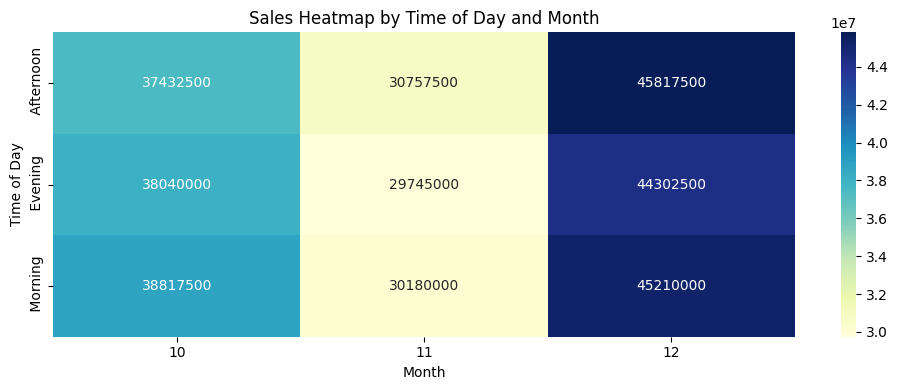

In [44]:
# Pivot to get data in grid format for heatmap
heatmap_data = time_analysis.pivot(index='Time of Day', columns='Month', values='Total Sales')

plt.figure(figsize=(10, 4))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Sales Heatmap by Time of Day and Month')
plt.ylabel('Time of Day')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

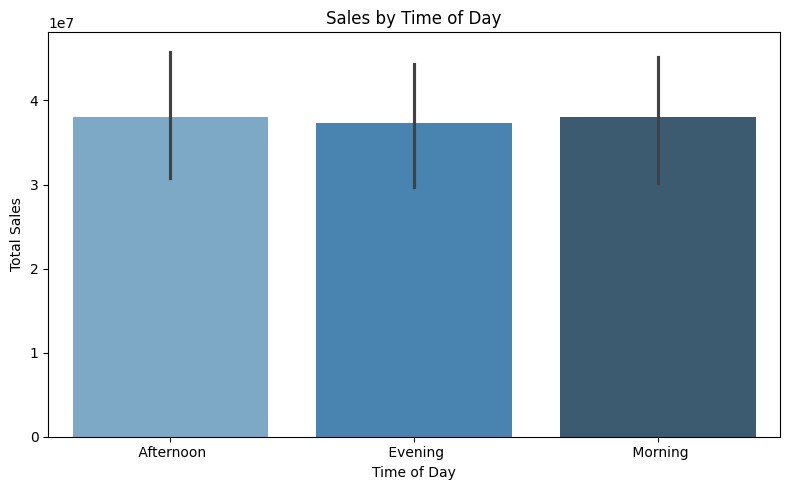

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(8, 5))
sns.barplot(data=time_analysis, x='Time of Day', y='Total Sales', hue='Time of Day', palette='Blues_d',  legend=False)
plt.title('Sales by Time of Day')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

### b. Clarity and Accessibility

To ensure clarity and accessibility of the visualizations:

- **Color palettes** are consistent and visually distinct.
- **Labels, annotations, and legends** are added for better interpretability.
- Charts are organized by **time intervals** (daily, weekly, monthly, quarterly) to give flexibility in decision-making.

Examples include:
- `lineplot` for time series trends (daily/weekly sales),
- `barplot` for category-wise summaries,
- `heatmap` for comparative insights,
- `boxplot` for distribution analysis.

All charts are sized appropriately using `figsize` and optimized using `tight_layout()` for better readability in dashboards.


In [47]:
df['Week'] = pd.to_datetime(df['Date']).dt.to_period('W').dt.start_time
df['Month'] = pd.to_datetime(df['Date']).dt.to_period('M').dt.start_time
df['Quarter'] = pd.to_datetime(df['Date']).dt.to_period('Q').dt.start_time
df['Day'] = pd.to_datetime(df['Date']).dt.date

daily = df.groupby('Day')['Sales'].sum().reset_index()
weekly = df.groupby('Week')['Sales'].sum().reset_index()
monthly = df.groupby('Month')['Sales'].sum().reset_index()
quarterly = df.groupby('Quarter')['Sales'].sum().reset_index()

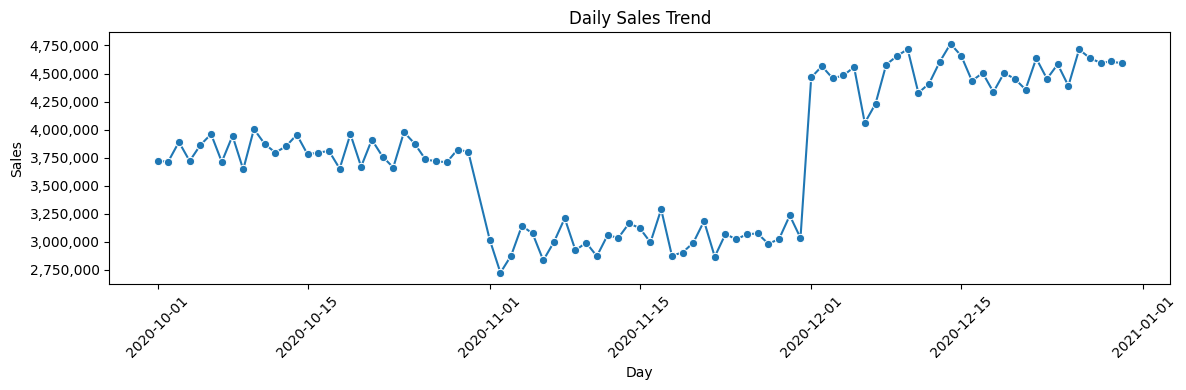

In [55]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=daily, x='Day', y='Sales', marker='o')
plt.title('Daily Sales Trend')
plt.xticks(rotation=45)
# Format y-axis to show full numbers (avoid scientific notation)
ax = plt.gca()  # Get current axes
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

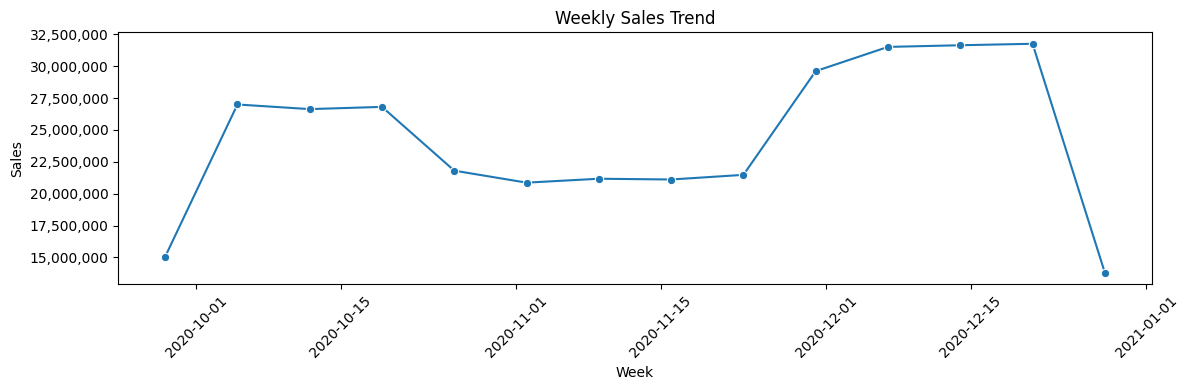

In [56]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=weekly, x='Week', y='Sales', marker='o')
plt.title('Weekly Sales Trend')
plt.xticks(rotation=45)

# Format y-axis to show full numbers (avoid scientific notation)
ax = plt.gca()  # Get current axes
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

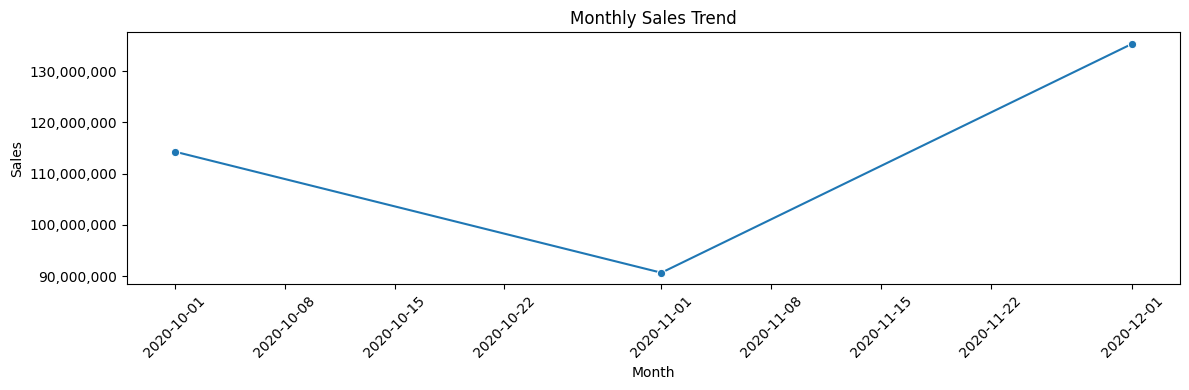

In [58]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=monthly, x='Month', y='Sales', marker='o')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
# Format y-axis to show full numbers (avoid scientific notation)
ax = plt.gca()  # Get current axes
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

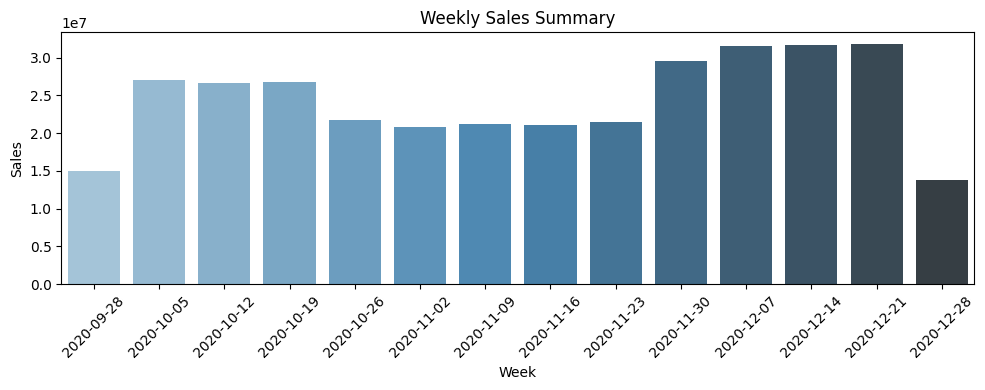

In [59]:
plt.figure(figsize=(10, 4))
sns.barplot(data=weekly, x='Week', y='Sales', hue='Week', palette='Blues_d', legend=False)
plt.title('Weekly Sales Summary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


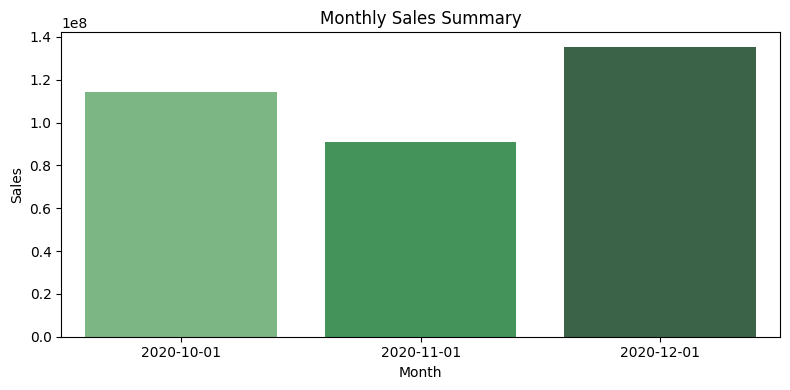

In [60]:
plt.figure(figsize=(8, 4))
sns.barplot(data=monthly, x='Month', y='Sales', hue='Month', palette='Greens_d', legend=False)
plt.title('Monthly Sales Summary')
plt.tight_layout()
plt.show()


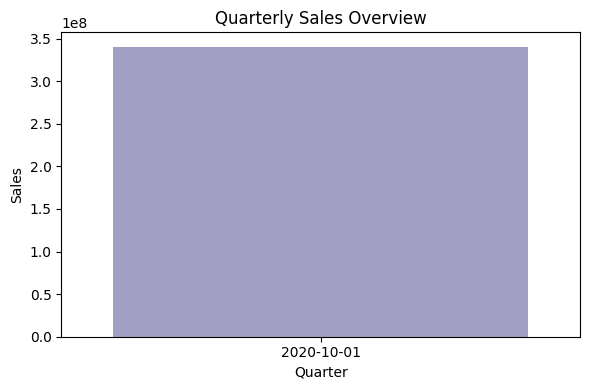

In [61]:
plt.figure(figsize=(6, 4))
sns.barplot(data=quarterly, x='Quarter', y='Sales', hue='Quarter', palette='Purples', legend=False)
plt.title('Quarterly Sales Overview')
plt.tight_layout()
plt.show()


### c. Visualization Library Recommendation
**Preferred Library: `Seaborn`**

#### Reasons for choosing Seaborn:
- Built on top of Matplotlib and offers **high-level, statistical-oriented visualizations**.
- Integrates well with **Pandas DataFrames** for quick plot generation.
- Supports **aesthetic themes** and customization out-of-the-box.
- Excellent for **distribution plots, correlation heatmaps, and category comparisons**, which are integral to sales analysis.

Other libraries used:
- `Matplotlib`: for plot customization and layout control.
- `Plotly`: (optional) for interactive and dynamic visualizations.
- 
#### Why I Recommend Seaborn:
I recommend Seaborn as the primary visualization package for this sales analysis dashboard because of the following reasons:

Statistical Insight Integration
Seaborn is specifically designed for statistical data visualization. Since this analysis involves trends, distributions, and comparisons (daily, weekly, monthly, quarterly sales), Seaborn makes it easy to extract insights using built-in support for:

Aggregations (estimator='mean', sum, etc.)

Error bars and confidence intervals

Heatmaps, time series, and categorical plots

Cleaner, More Professional Aesthetics
Seaborn produces high-quality visuals by default, with aesthetically pleasing styles that are well-suited for executive dashboards or presentation-ready outputs.

Easy Integration with Pandas
Since our data is already structured in DataFrames, Seaborn integrates seamlessly with them — reducing boilerplate code and making it easy to visualize groupby() or pivot() outputs directly.

Consistency Across Charts
Using Seaborn ensures visual consistency (color palettes, grid styles, labels) across:

Time-series line plots

Bar charts (e.g., group-wise and state-wise sales)

Heatmaps (e.g., for identifying peak periods)

Matplotlib Compatibility
While Seaborn provides high-level APIs, it sits on top of Matplotlib, so if additional customization is needed (like annotation, titles, export settings), it’s easy to enhance charts further.
| Tool              | Why not chosen                                                                          |
| ----------------- | --------------------------------------------------------------------------------------- |
| **Matplotlib**    | Too low-level for statistical plots — more code needed to achieve similar visuals       |
| **Plotly**        | Great for interactivity, but overkill if exporting static reports or working in Jupyter |
| **Altair**        | Clean and declarative, but limited with large datasets or complex formatting            |
| **Excel/Tableau** | Not scriptable or as reproducible as Python/Seaborn workflows                           |
